# COMP 6934 - Assignment 2

Name: Mohammad Shehabul Islam

ID: 202196528

# Question 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sleep.csv')
df.head()

,Age group,Min age,Max age,Not recommended lower,Approriate lower,Recommended lower,Recommended upper,Appropriate upper,Not recommended upper
0,Newborns,0.00,0.33,11,13,14,17,18,19
1,Infants,0.33,1.00,10,11,12,15,16,18
2,Toddlers,1.00,3.00,9,10,11,14,15,16
3,Preschoolers,3.00,6.00,8,9,10,13,14,15
4,School-aged children,6.00,12.00,7,8,9,12,12,12


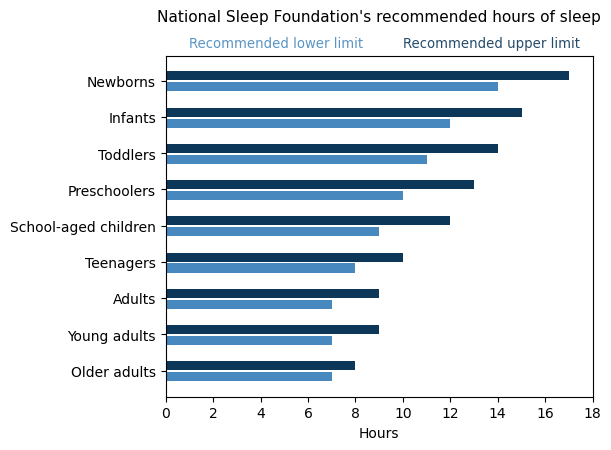

In [3]:
def grouped_bar_plot(df1, width, gap):
    fig, ax = plt.subplots(figsize=(5,4))  
    fig.tight_layout()

    x = np.arange(len(df1['Age group']))
    ax.barh(x, df1['Recommended lower'], width, color='#4789be', label='Recommended lower')
    ax.barh(x+width+gap, df1['Recommended upper'], width, color='#0c3759', label='Recommended upper')
    ax.set_yticks(x+width/1.5, df1['Age group'])
    ax.set_xlabel('Hours')
    ax.set_xlim(0, df1['Recommended upper'].max()+1)
    ax.set_title("National Sleep Foundation's recommended hours of sleep", fontsize=11, pad=25)
    ax.text(1,9.1,'Recommended lower limit', c='#4789be', fontsize=9.5, alpha=0.9)
    ax.text(10,9.1,'Recommended upper limit', c='#0c3759', fontsize=9.5, alpha=0.9)
    fig.savefig('Answer 1.png', bbox_inches='tight')
    return None

# Making a copy of the original dataframe
df1 = df.copy()
df1 = df1[['Age group','Recommended lower','Recommended upper']].sort_values(by=['Recommended upper','Recommended lower'])

# Function Call
grouped_bar_plot(df1,width=0.25, gap=0.05)

# Question 2

In [4]:
# Making another copy of the original dataframe
df2 = df.copy()
df2 = df2[['Age group', 'Recommended lower', 'Recommended upper']].sort_values(by=['Recommended upper','Recommended lower'])
df2.head()

,Age group,Recommended lower,Recommended upper
8,Older adults,7,8
6,Young adults,7,9
7,Adults,7,9
5,Teenagers,8,10
4,School-aged children,9,12


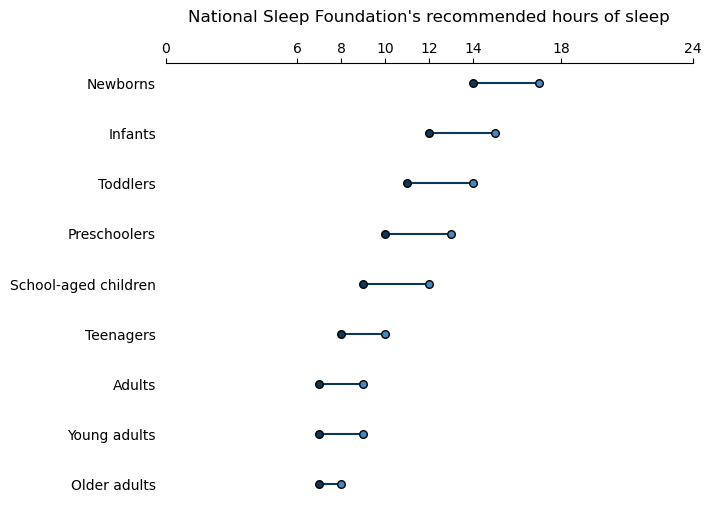

In [5]:
def connected_dot_plot(df2, color1, color2):
    fig, ax = plt.subplots(figsize=(6,5))
    fig.tight_layout()
    
    ax.scatter(df2['Recommended lower'], df2['Age group'], s=30, color=color1, edgecolors='black', zorder=3)
    ax.scatter(df2['Recommended upper'], df2['Age group'], s=30, color=color2, edgecolors='black', zorder=3)

    ax.hlines(df2['Age group'], df2['Recommended lower'], df2['Recommended upper'], linewidth=1.5,alpha=1, color=color1)
    ax.spines[['left','right','bottom']].set_visible(False) 
    ax.set_xlim(0,24)
    ax.xaxis.set_tick_params(labeltop=True,   # puts x-axis labels on top
                             labelbottom=False,  # sets no x-axis labels on bottom
                             bottom=False,   # sets no ticks on bottom
                             top=True,   # sets ticks on top  
                             pad=2)  # lower tick labels a bit
    ax.yaxis.set_tick_params(left=False)   # sets no ticks on left
    ax.set_xticks([0,6,8,10,12,14,18,24])
    ax.set_title("National Sleep Foundation's recommended hours of sleep", pad=30, fontsize=12)
    fig.savefig('Answer 2.png', bbox_inches='tight')
    
df2 = df.copy()
df2 = df2[['Age group', 'Recommended lower', 'Recommended upper']].sort_values(by=['Recommended upper','Recommended lower'])

# Function Call
connected_dot_plot(df2,'#0c3759', '#4789be')

# Question 3

In [6]:
import matplotlib.ticker as ticker
from matplotlib.patches import Rectangle
from matplotlib.font_manager import FontProperties
import math

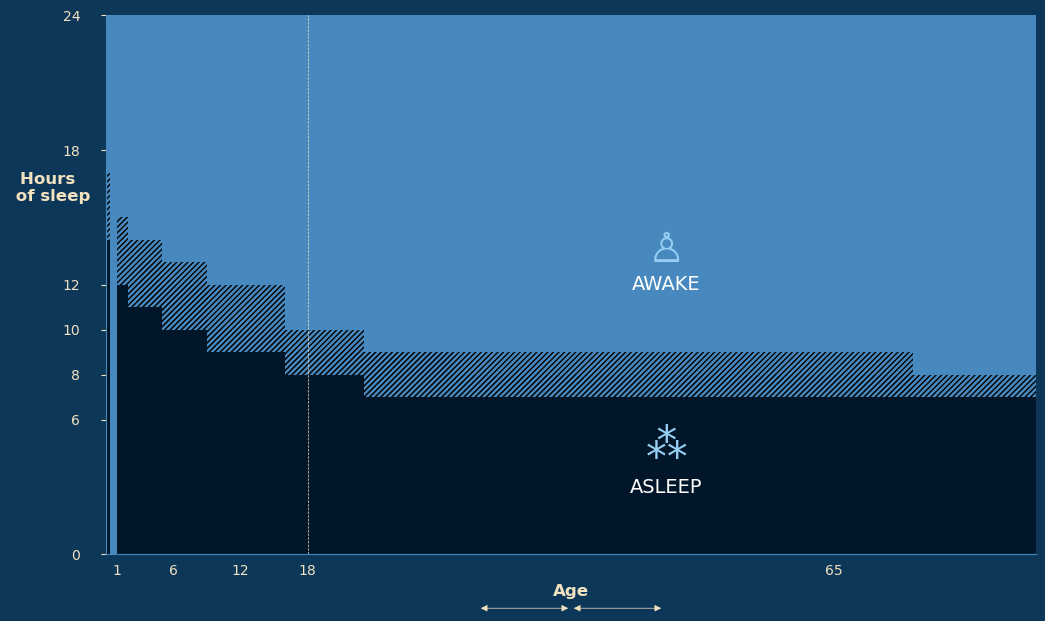

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
from matplotlib.patches import Rectangle
from matplotlib.font_manager import FontProperties

age_categories = ['Newborn', 'Infant', 'Toddler', 'Preschool', 'School age', 'Teen', 'Young Adult', 'Adult', '65 and older']
recommended_lower = [14, 12, 11, 10, 9, 8, 7, 7, 7]
recommended_upper = [17, 15, 14, 13, 12, 10, 9, 9, 8]
age = [0.33, 1, 3, 6, 12, 18, 25, 65, 75]  

colors = ['#0c3759', '#4789be']
fig, ax = plt.subplots(figsize=(12, 7))

df3 = pd.read_csv('sleep.csv')
index = np.arange(len(df3))


ax.bar(index, df3['Recommended upper'], width=age, hatch='//////', color='#4789be', align='edge', alpha=0.7)
ax.bar(index, df3['Recommended lower'], width=age, color='#011629', align='edge')
ax.axvline(x=18, color='#f3e2c0', linestyle='--', linewidth=0.5)
ax.set_yticks(np.arange(0, 25, 1))
ax.set_yticklabels(np.arange(0, 25, 1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=0.5))  
ax.tick_params(axis='y', which='major', pad=15)
ax.tick_params(axis='x', colors='#f3e2c0')
ax.tick_params(axis='y', colors='#f3e2c0')
ax.xaxis.set_tick_params(bottom=False)  
ax.set_yticks([0,6,8,10,12,18,24])
ax.set_xticks([1,6,12,18, 65])
ax.set_xlabel('Age', fontsize=12, weight='bold')
ax.xaxis.label.set_color('#f3e2c0')
ax.set_ylabel('Hours \n of sleep', fontsize=12, weight='bold', rotation='horizontal', labelpad=20)
ax.yaxis.label.set_color('#f3e2c0')
ax.text(50, 12, 'AWAKE', ha='center', va='center', fontsize=14, color='white')
ax.text(50, 3, 'ASLEEP', ha='center', va='center', fontsize=14, color='white')
fig.patch.set_facecolor('#0c3759')
ax.set_facecolor('#4789be')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#4789be')
ax.spines['left'].set_color('#4789be')
ax.tick_params(axis='y', which='both', left=True, labelleft=True)
ax.set_yticks([0, 6, 8, 10, 12, 18, 24])
ax.yaxis.set_label_coords(-.06, .65)
arrow_size = 0.1  
age_label_position = 0.5 
ax.annotate("", xy=(age_label_position - arrow_size, -0.1), xytext=(age_label_position, -0.1),
            arrowprops=dict(arrowstyle="<|-|>", color='#f3e2c0', linewidth=0.5), xycoords='axes fraction', ha='center')

ax.annotate("", xy=(age_label_position + arrow_size, -0.1), xytext=(age_label_position, -0.1),
            arrowprops=dict(arrowstyle="<|-|>", color='#f3e2c0', linewidth=0.5), xycoords='axes fraction', ha='center')


ax.margins(x=0)
ax.text(50, 13.5, '\u2659', fontsize=30, color='#95cef2', ha='center', va='center')
ax.text(50, 4.8, '\u2042', fontsize=30, color='#95cef2', ha='center', va='center')


# plt.tight_layout()
plt.show()